In [2]:
library(tidyverse)
library(plyr)
library(magrittr)
library(dplyr)
library(tidyr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr

In [3]:
data = read.csv("shark_data.csv")
data_tibble = as_tibble(data)
head(data_tibble)

Date,Location,Species,Sex,PCL..cm.,FL,TL,Cin,Cout
9/19/06,Kaneohe,C. plumbeus,M,NA,NA,NA,NA,NA
9/26/06,Kaneohe,C. plumbeus,F,90,102,131,NA,NA
9/26/06,Kaneohe,C. plumbeus,NA,NA,NA,NA,NA,NA
9/27/06,Kaneohe,C. plumbeus,F,103,113,144,NA,NA
10/4/06,Kaneohe,C. limbatis,M,140,150,190,NA,NA
10/9/06,Kaneohe,C. plumbeus,F,134,142,183,NA,NA


In [4]:
data_index = data[ , 1:9]
head(data_index)

Date,Location,Species,Sex,PCL..cm.,FL,TL,Cin,Cout
9/19/06,Kaneohe,C. plumbeus,M,NA,NA,NA,NA,NA
9/26/06,Kaneohe,C. plumbeus,F,90,102,131,NA,NA
9/26/06,Kaneohe,C. plumbeus,NA,NA,NA,NA,NA,NA
9/27/06,Kaneohe,C. plumbeus,F,103,113,144,NA,NA
10/4/06,Kaneohe,C. limbatis,M,140,150,190,NA,NA
10/9/06,Kaneohe,C. plumbeus,F,134,142,183,NA,NA


In [5]:
sharks = as_tibble(data_index)
head(sharks)

Date,Location,Species,Sex,PCL..cm.,FL,TL,Cin,Cout
9/19/06,Kaneohe,C. plumbeus,M,NA,NA,NA,NA,NA
9/26/06,Kaneohe,C. plumbeus,F,90,102,131,NA,NA
9/26/06,Kaneohe,C. plumbeus,NA,NA,NA,NA,NA,NA
9/27/06,Kaneohe,C. plumbeus,F,103,113,144,NA,NA
10/4/06,Kaneohe,C. limbatis,M,140,150,190,NA,NA
10/9/06,Kaneohe,C. plumbeus,F,134,142,183,NA,NA


## Setting Data to Appropriate Form

In [6]:
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:plyr’:

    here

The following object is masked from ‘package:base’:

    date



In [7]:
sharks <- sharks %>% 
    mutate(Date = as.Date(x=sharks$Date, format="%m/%d/%Y"))

In [8]:
sharks <- sharks %>% mutate(FL = as.numeric(as.character(sharks$FL)))

Warning message in eval(cols[[col]], .data, parent.frame()):
“NAs introduced by coercion”

In [9]:
sharks <- sharks %>% mutate(Cin = as.numeric(as.character(sharks$Cin)))

Warning message in eval(cols[[col]], .data, parent.frame()):
“NAs introduced by coercion”

In [10]:
str(sharks)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	807 obs. of  9 variables:
 $ Date    : Date, format: "0006-09-19" "0006-09-26" ...
 $ Location: Factor w/ 8 levels "Big Island","Ewa",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Species : Factor w/ 18 levels "A. narinari",..: 9 9 9 9 6 9 6 9 9 12 ...
 $ Sex     : Factor w/ 2 levels "F","M": 2 1 NA 1 2 1 2 1 2 1 ...
 $ PCL..cm.: num  NA 90 NA 103 140 134 89 136 114 110 ...
 $ FL      : num  NA 102 NA 113 150 142 99 151 121 120 ...
 $ TL      : num  NA 131 NA 144 190 183 116 188 150 170 ...
 $ Cin     : num  NA NA NA NA NA NA 2.2 NA 17 NA ...
 $ Cout    : num  NA NA NA NA NA NA 6.3 NA 13 NA ...


## Data Cleaning

In [11]:
count(sharks, "Species")

Species,freq
A. narinari,1
A. superciliosus,2
C. altimus,4
C. galapagensis,26
C. ignobilis,3
C. limbatis,35
C. melanopterus,3
C. oligoporus,1
C. plumbeus,367
D. lata,20


In [12]:
count(sharks, "Location")

Location,freq
Big Island,3
Ewa,7
Kaneohe,741
Maui,9
NWHI,8
North Shore,16
South Shore,7
Waikiki,16


In [13]:
count(sharks, "Sex")

Sex,freq
F,448
M,339
NA,20


## Omitting Missing Values

In [14]:
sharks %>% drop_na(Species)

Date,Location,Species,Sex,PCL..cm.,FL,TL,Cin,Cout
0006-09-19,Kaneohe,C. plumbeus,M,NA,NA,NA,NA,NA
0006-09-26,Kaneohe,C. plumbeus,F,90.0,102,131,NA,NA
0006-09-26,Kaneohe,C. plumbeus,NA,NA,NA,NA,NA,NA
0006-09-27,Kaneohe,C. plumbeus,F,103.0,113,144,NA,NA
0006-10-04,Kaneohe,C. limbatis,M,140.0,150,190,NA,NA
0006-10-09,Kaneohe,C. plumbeus,F,134.0,142,183,NA,NA
0006-11-06,Kaneohe,C. limbatis,M,89.0,99,116,2.2,6.3
0006-11-07,Kaneohe,C. plumbeus,F,136.0,151,188,NA,NA
0006-11-08,Kaneohe,C. plumbeus,M,114.0,121,150,17.0,13.0
0006-12-08,Kaneohe,G. cuvier,F,110.0,120,170,NA,NA


In [15]:
sharks %>% drop_na(Sex)

Date,Location,Species,Sex,PCL..cm.,FL,TL,Cin,Cout
0006-09-19,Kaneohe,C. plumbeus,M,NA,NA,NA,NA,NA
0006-09-26,Kaneohe,C. plumbeus,F,90.0,102,131,NA,NA
0006-09-27,Kaneohe,C. plumbeus,F,103.0,113,144,NA,NA
0006-10-04,Kaneohe,C. limbatis,M,140.0,150,190,NA,NA
0006-10-09,Kaneohe,C. plumbeus,F,134.0,142,183,NA,NA
0006-11-06,Kaneohe,C. limbatis,M,89.0,99,116,2.2,6.3
0006-11-07,Kaneohe,C. plumbeus,F,136.0,151,188,NA,NA
0006-11-08,Kaneohe,C. plumbeus,M,114.0,121,150,17.0,13.0
0006-12-08,Kaneohe,G. cuvier,F,110.0,120,170,NA,NA
0006-12-13,Kaneohe,C. plumbeus,F,125.0,137,175,NA,NA


In [16]:
sharks %>% drop_na(PCL..cm.)

Date,Location,Species,Sex,PCL..cm.,FL,TL,Cin,Cout
0006-09-26,Kaneohe,C. plumbeus,F,90.0,102,131,NA,NA
0006-09-27,Kaneohe,C. plumbeus,F,103.0,113,144,NA,NA
0006-10-04,Kaneohe,C. limbatis,M,140.0,150,190,NA,NA
0006-10-09,Kaneohe,C. plumbeus,F,134.0,142,183,NA,NA
0006-11-06,Kaneohe,C. limbatis,M,89.0,99,116,2.2,6.3
0006-11-07,Kaneohe,C. plumbeus,F,136.0,151,188,NA,NA
0006-11-08,Kaneohe,C. plumbeus,M,114.0,121,150,17.0,13.0
0006-12-08,Kaneohe,G. cuvier,F,110.0,120,170,NA,NA
0006-12-13,Kaneohe,C. plumbeus,F,125.0,137,175,NA,NA
0006-12-13,Kaneohe,C. plumbeus,F,100.0,112,143,NA,NA


In [17]:
sharks %>% drop_na(FL)

Date,Location,Species,Sex,PCL..cm.,FL,TL,Cin,Cout
0006-09-26,Kaneohe,C. plumbeus,F,90.0,102,131,NA,NA
0006-09-27,Kaneohe,C. plumbeus,F,103.0,113,144,NA,NA
0006-10-04,Kaneohe,C. limbatis,M,140.0,150,190,NA,NA
0006-10-09,Kaneohe,C. plumbeus,F,134.0,142,183,NA,NA
0006-11-06,Kaneohe,C. limbatis,M,89.0,99,116,2.2,6.3
0006-11-07,Kaneohe,C. plumbeus,F,136.0,151,188,NA,NA
0006-11-08,Kaneohe,C. plumbeus,M,114.0,121,150,17.0,13.0
0006-12-08,Kaneohe,G. cuvier,F,110.0,120,170,NA,NA
0006-12-13,Kaneohe,C. plumbeus,F,125.0,137,175,NA,NA
0006-12-13,Kaneohe,C. plumbeus,F,100.0,112,143,NA,NA


In [18]:
sharks %>% drop_na(TL)

Date,Location,Species,Sex,PCL..cm.,FL,TL,Cin,Cout
0006-09-26,Kaneohe,C. plumbeus,F,90.0,102,131,NA,NA
0006-09-27,Kaneohe,C. plumbeus,F,103.0,113,144,NA,NA
0006-10-04,Kaneohe,C. limbatis,M,140.0,150,190,NA,NA
0006-10-09,Kaneohe,C. plumbeus,F,134.0,142,183,NA,NA
0006-11-06,Kaneohe,C. limbatis,M,89.0,99,116,2.2,6.3
0006-11-07,Kaneohe,C. plumbeus,F,136.0,151,188,NA,NA
0006-11-08,Kaneohe,C. plumbeus,M,114.0,121,150,17.0,13.0
0006-12-08,Kaneohe,G. cuvier,F,110.0,120,170,NA,NA
0006-12-13,Kaneohe,C. plumbeus,F,125.0,137,175,NA,NA
0006-12-13,Kaneohe,C. plumbeus,F,100.0,112,143,NA,NA


## Male Sharks PCA

In [19]:
sharks_males <- sharks %>% drop_na(Species) %>% 
    drop_na(PCL..cm.) %>% drop_na(FL) %>% drop_na(TL) %>%
    drop_na(Cin) %>% drop_na(Cout)

In [20]:
library(FactoMineR)

Warning message:
“package ‘FactoMineR’ was built under R version 3.6.3”

In [21]:
sharks_males_pca <- prcomp(sharks_males[ ,c(5:9)], center = TRUE, scale = TRUE)
sharks_males_pca

Standard deviations (1, .., p=5):
[1] 2.17412833 0.49412968 0.14637787 0.08193551 0.02935896

Rotation (n x k) = (5 x 5):
               PC1        PC2          PC3          PC4          PC5
PCL..cm. 0.4516773  0.3712728 -0.021636422  0.495063186  0.642330499
FL       0.4518160  0.3731404 -0.036748710  0.287939883 -0.756550500
TL       0.4527320  0.3303113 -0.006839089 -0.819166863  0.121848551
Cin      0.4422076 -0.5123050  0.735487825  0.029747966 -0.012990250
Cout     0.4374197 -0.5927570 -0.676159955  0.009152873  0.005201457

In [22]:
sharks_males_pca$rotation

,PC1,PC2,PC3,PC4,PC5
PCL..cm.,0.4516773,0.3712728,-0.021636422,0.495063186,0.642330499
FL,0.4518160,0.3731404,-0.036748710,0.287939883,-0.756550500
TL,0.4527320,0.3303113,-0.006839089,-0.819166863,0.121848551
Cin,0.4422076,-0.5123050,0.735487825,0.029747966,-0.012990250
Cout,0.4374197,-0.5927570,-0.676159955,0.009152873,0.005201457


In [23]:
sharks_males_pca$sdev^2

[1] 4.7268340001 0.2441641436 0.0214264802 0.0067134276 0.0008619485

In [24]:
sharks_males_pca$rotation[2,1]

[1] 0.451816

In [25]:
library(factoextra)

Warning message:
“package ‘factoextra’ was built under R version 3.6.3”Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


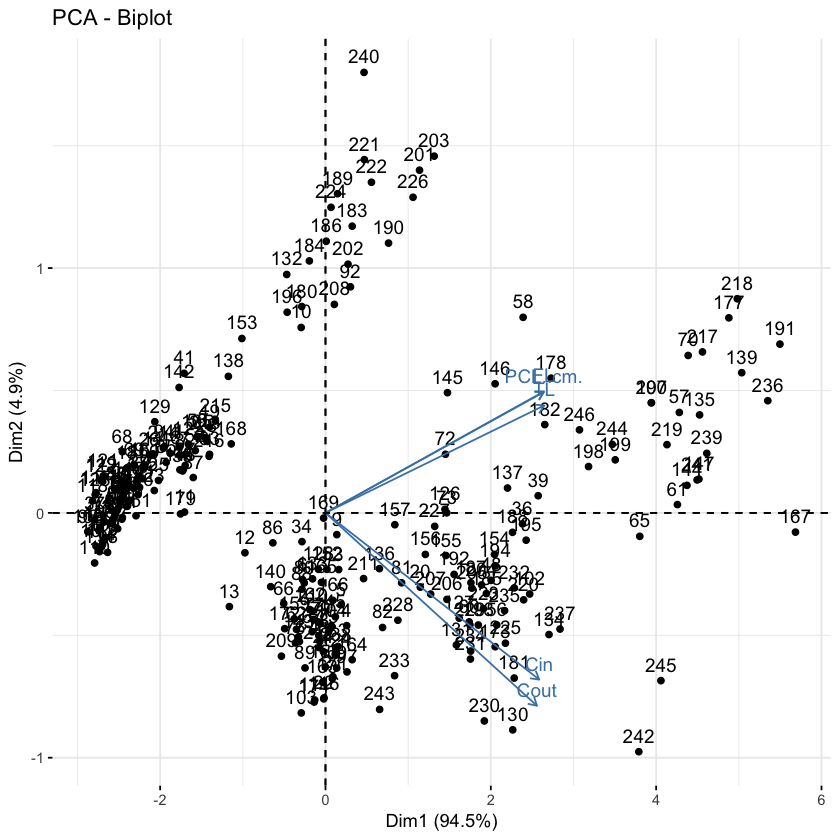

In [26]:
fviz_pca_biplot(sharks_males_pca)

In [27]:
library(ggfortify)

Warning message:
“package ‘ggfortify’ was built under R version 3.6.3”

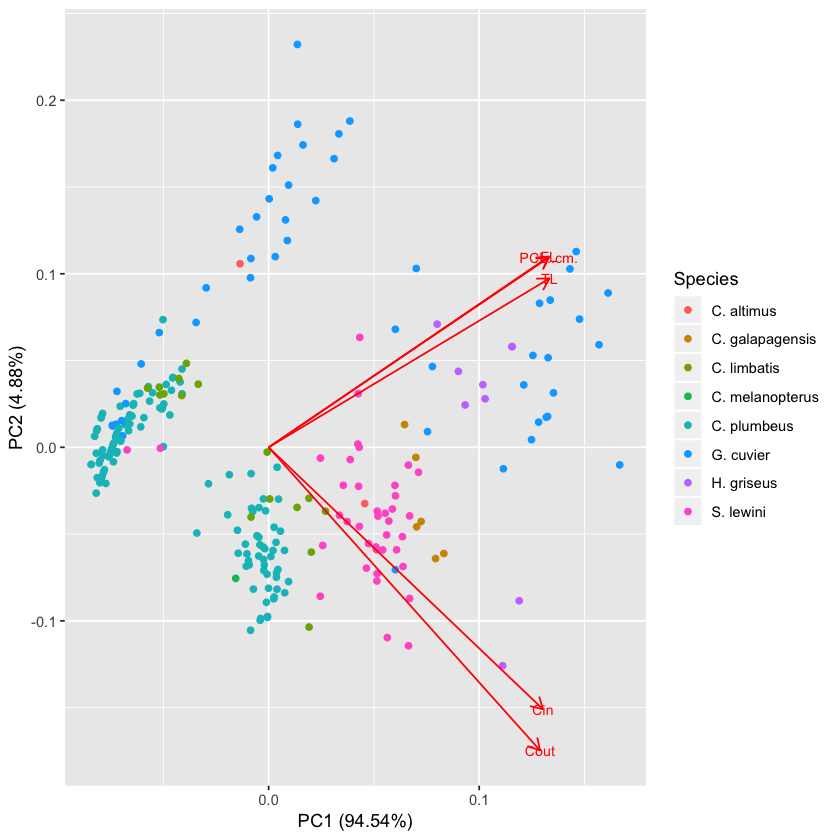

In [28]:
autoplot(sharks_males_pca, data=sharks_males, colour = 'Species', 
    loadings = TRUE, loadings.color = "blue",
    loadings.label = TRUE, loadings.label.size = 3)

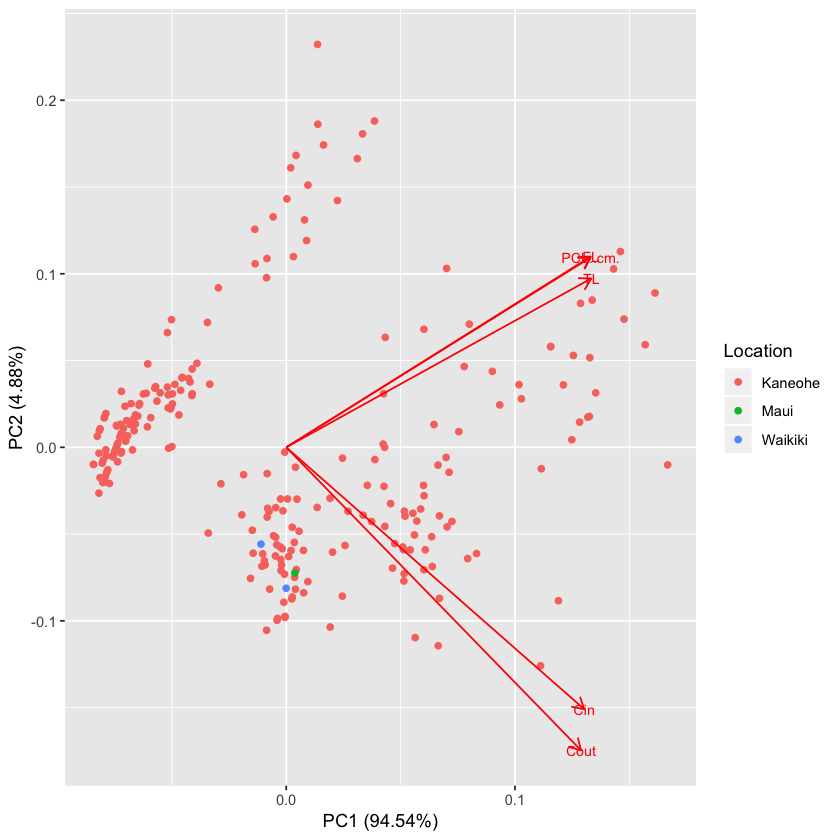

In [29]:
autoplot(sharks_males_pca, data=sharks_males, colour = 'Location', 
    loadings = TRUE, loadings.color = "blue",
    loadings.label = TRUE, loadings.label.size = 3)

## Female Sharks PCA

In [30]:
sharks_females <- sharks %>% drop_na(Species) %>% 
    drop_na(PCL..cm.) %>% drop_na(FL) %>% drop_na(TL)

In [31]:
sharks_females_pca <- prcomp(sharks_females[ ,c(5:7)], center = TRUE, scale = TRUE)
sharks_females_pca

Standard deviations (1, .., p=3):
[1] 1.70840583 0.27570335 0.07305605

Rotation (n x k) = (3 x 3):
               PC1        PC2        PC3
PCL..cm. 0.5701410  0.8211804 -0.0245360
FL       0.5812725 -0.3821090  0.7184114
TL       0.5805699 -0.4238579 -0.6951856

In [32]:
sharks_females_pca$rotation

,PC1,PC2,PC3
PCL..cm.,0.5701410,0.8211804,-0.0245360
FL,0.5812725,-0.3821090,0.7184114
TL,0.5805699,-0.4238579,-0.6951856


In [33]:
sharks_females_pca$sdev^2

[1] 2.918650476 0.076012337 0.005337187

In [34]:
sharks_females_pca$rotation[2,1]

[1] 0.5812725

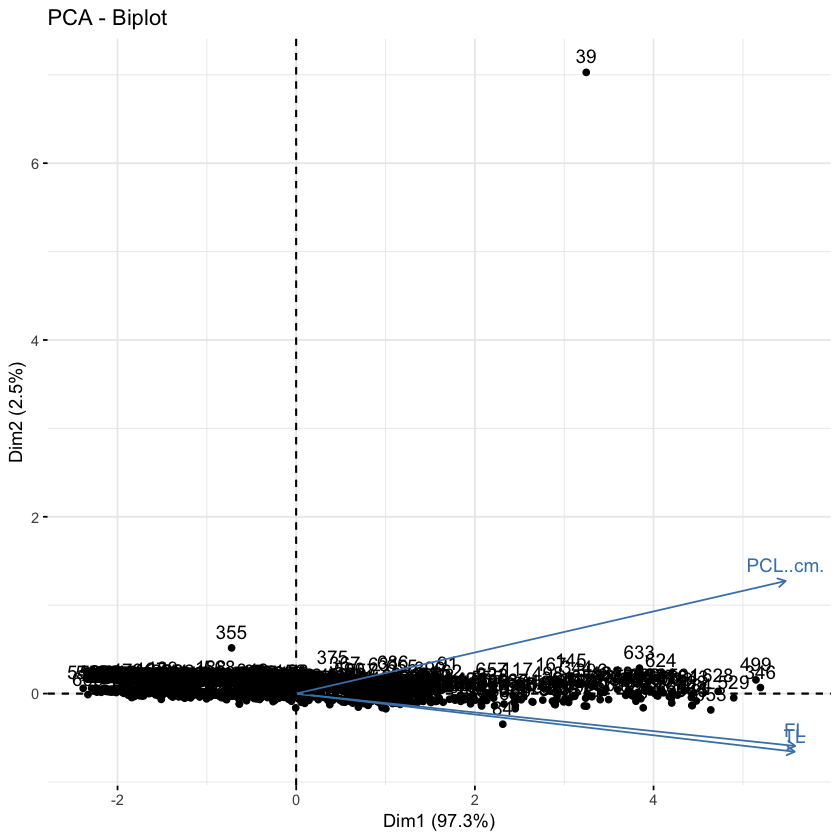

In [39]:
fviz_pca_biplot(sharks_females_pca)

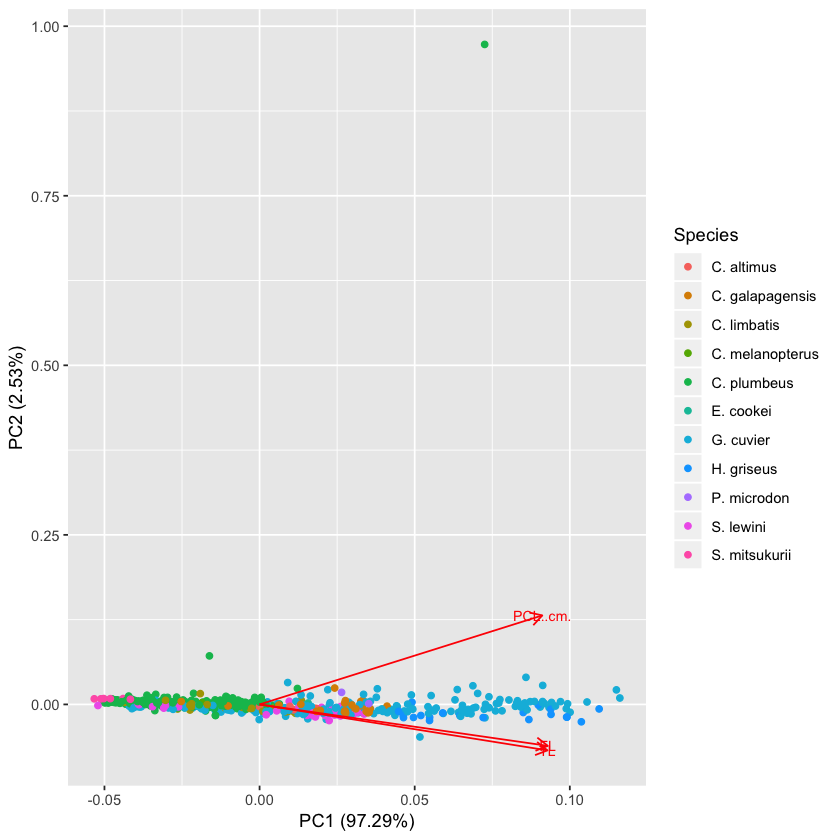

In [38]:
autoplot(sharks_females_pca, data=sharks_females, colour = 'Species', 
    loadings = TRUE, loadings.color = "blue",
    loadings.label = TRUE, loadings.label.size = 3)

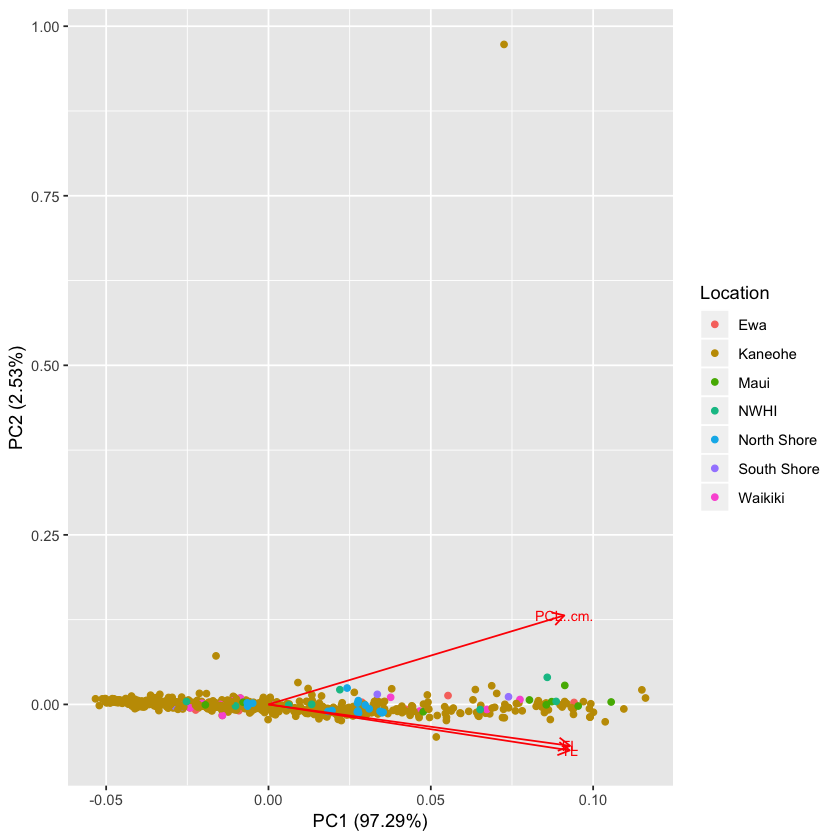

In [37]:
autoplot(sharks_females_pca, data=sharks_females, colour = 'Location', 
    loadings = TRUE, loadings.color = "blue",
    loadings.label = TRUE, loadings.label.size = 3)